<a href="https://colab.research.google.com/github/NadiaTamayo15/BrainFoodChallenge/blob/main/ProyectoComputoCognitivo_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Obtención de bases de datos


In [ ]:
#Configuración de kaggle token
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install -q kaggle
!kaggle datasets download -d mohamedasem318/wesad-full-dataset

In [ ]:
!unzip wesad-full-dataset.zip -d wesad_data

Archive:  wesad-full-dataset.zip
  inflating: wesad_data/LICENSE.txt  
  inflating: wesad_data/README.txt   
  inflating: wesad_data/WESAD/S10/S10.pkl  
  inflating: wesad_data/WESAD/S10/S10_E4_Data/ACC.csv  
  inflating: wesad_data/WESAD/S10/S10_E4_Data/BVP.csv  
  inflating: wesad_data/WESAD/S10/S10_E4_Data/EDA.csv  
  inflating: wesad_data/WESAD/S10/S10_E4_Data/HR.csv  
  inflating: wesad_data/WESAD/S10/S10_E4_Data/IBI.csv  
  inflating: wesad_data/WESAD/S10/S10_E4_Data/TEMP.csv  
  inflating: wesad_data/WESAD/S10/S10_E4_Data/info.txt  
  inflating: wesad_data/WESAD/S10/S10_E4_Data/tags.csv  
  inflating: wesad_data/WESAD/S10/S10_quest.csv  
  inflating: wesad_data/WESAD/S10/S10_readme.txt  
  inflating: wesad_data/WESAD/S10/S10_respiban.txt  
  inflating: wesad_data/WESAD/S11/S11.pkl  
  inflating: wesad_data/WESAD/S11/S11_E4_Data/ACC.csv  
  inflating: wesad_data/WESAD/S11/S11_E4_Data/BVP.csv  
  inflating: wesad_data/WESAD/S11/S11_E4_Data/EDA.csv  
  inflating: wesad_data/WESAD/S

In [ ]:
!pip install -q kagglehub tensorflow numpy pandas scikit-learn matplotlib


In [ ]:
ls

sample_data/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
OUTPUT_PATH = "/kaggle/working/"  # Store processed files in Kaggle working directory

chest_columns = ['sid', 'acc1', 'acc2', 'acc3', 'ecg', 'emg', 'eda', 'temp', 'resp', 'label']

# List of subject IDs
ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]

In [ ]:
import os, kagglehub, pathlib, collections
from PIL import Image

# Base FER2013
base_dir = kagglehub.dataset_download("msambare/fer2013")
train_dir = pathlib.Path(base_dir) / "train"
test_dir  = pathlib.Path(base_dir) / "test"
print(f"Dataset descargado en: {base_dir}")

# Descripción
def contar_imagenes_por_clase(directorio: pathlib.Path):
    """Devuelve un diccionario {clase: cantidad_de_imágenes}."""
    conteo = {}
    for subcarpeta in sorted(directorio.iterdir()):
        if subcarpeta.is_dir():
            n = len(list(subcarpeta.glob("*")))
            conteo[subcarpeta.name] = n
    return conteo

def tamaño_imagen_ejemplo(directorio: pathlib.Path):
    """Lee la primera imagen que encuentre para obtener su forma."""
    for ruta in directorio.rglob("*.*"):
        try:
            with Image.open(ruta) as img:
                return img.size[::-1]  # (alto, ancho)
        except Exception:
            continue
    return None

conteo_train = contar_imagenes_por_clase(train_dir)
conteo_test  = contar_imagenes_por_clase(test_dir)

clases = sorted(conteo_train.keys())          # nombres de las clases
n_clases = len(clases)
total_train = sum(conteo_train.values())
total_test  = sum(conteo_test.values())
shape = tamaño_imagen_ejemplo(train_dir)

print("\n─"*60)
print("RESUMEN DEL DATASET FER-2013")
print("─"*60)
print(f"• Número de clases          : {n_clases}")
print(f"• Clases                    : {clases}")
print(f"• Imágenes de entrenamiento : {total_train}")
print(f"• Imágenes de prueba        : {total_test}")
print(f"• Total de imágenes         : {total_train + total_test}")
if shape:
    alto, ancho = shape
    print(f"• Dimensión típica          : {alto} × {ancho} píxeles (alto × ancho, escala de grises)")
print("─"*60)
print("Imágenes por clase (train / test):")
for c in clases:
    print(f"  - {c:<10}: {conteo_train[c]:5d} / {conteo_test[c]:5d}")
print("─"*60)


Dataset descargado en: /kaggle/input/fer2013

─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
─
RESUMEN DEL DATASET FER-2013
────────────────────────────────────────────────────────────
• Número de clases          : 7
• Clases                    : ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
• Imágenes de entrenamiento : 28709
• Imágenes de prueba        : 7178
• Total de imágenes         : 35887
• Dimensión típica          : 48 × 48 píxeles (alto × ancho, escala de grises)
────────────────────────────────────────────────────────────
Imágenes por clase (train / test):
  - angry     :  3995 /   958
  - disgust   :   436 /   111
  - fear      :  4097 /  1024
  - happy     :  7215 /  1774
  - neutral   :  4965 /  1233
  - sad       :  4830 /  1247
  - surprise  :  3171 /   831
────────────────────────────────────────────────────────────


Found 28709 files belonging to 7 classes.
Using 25839 files for training.
Found 28709 files belonging to 7 classes.
Using 2870 files for validation.
Found 7178 files belonging to 7 classes.
Clases: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Pesos de clase: {0: 1.0266046844269623, 1: 9.406618610747051, 2: 1.0010460615781582, 3: 0.5684387684387684, 4: 0.8260394187886635, 5: 0.8491274770777877, 6: 1.293372978330405}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 48, 48, 1)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast                 │ (None, 48, 48, 1)      │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 305,639 (1.17 MB)

 Trainable params: 304,743 (1.16 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
202/202 - 24s - 119ms/step - accuracy: 0.1798 - loss: 2.0382 - val_accuracy: 0.2418 - val_loss: 1.9860 - learning_rate: 3.0000e-04
Epoch 2/50
202/202 - 6s - 28ms/step - accuracy: 0.2184 - loss: 1.8911 - val_accuracy: 0.2251 - val_loss: 2.0110 - learning_rate: 3.0000e-04
Epoch 3/50
202/202 - 6s - 28ms/step - accuracy: 0.2507 - loss: 1.8446 - val_accuracy: 0.2909 - val_loss: 1.8291 - learning_rate: 3.0000e-04
Epoch 4/50
202/202 - 6s - 28ms/step - accuracy: 0.2898 - loss: 1.7743 - val_accuracy: 0.2714 - val_loss: 2.0251 - learning_rate: 3.0000e-04
Epoch 5/50
202/202 - 6s - 28ms/step - accuracy: 0.3316 - loss: 1.6961 - val_accuracy: 0.3617 - val_loss: 1.7038 - learning_rate: 3.0000e-04
Epoch 6/50
202/202 - 6s - 28ms/step - accuracy: 0.3622 - loss: 1.6307 - val_accuracy: 0.3561 - val_loss: 1.6480 - learning_rate: 3.0000e-04
Epoch 7/50
202/202 - 6s - 28ms/step - accuracy: 0.3876 - loss: 1.5721 - val_accuracy: 0.4146 - val_loss: 1.5426 - learning_rate: 3.0000e-04
Epoch 8/50
202/202

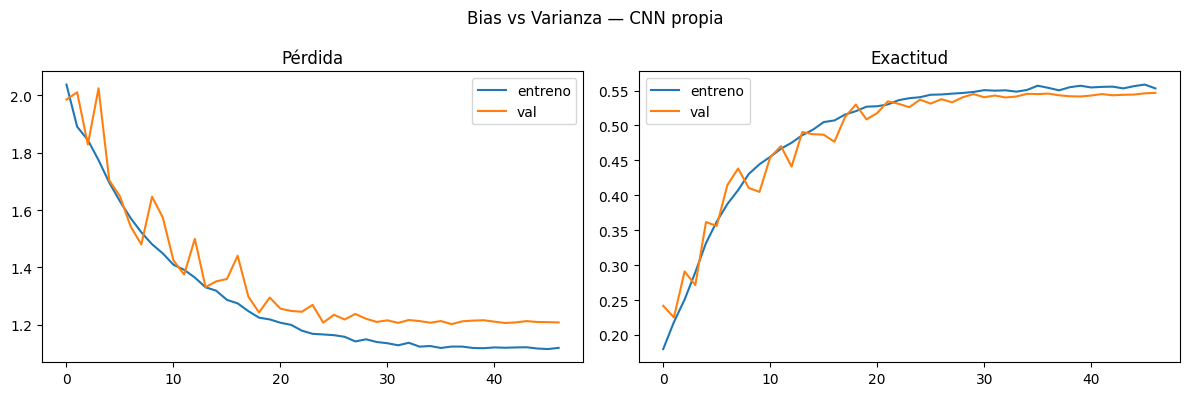

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Real: angry   Pred: sad (0.41)


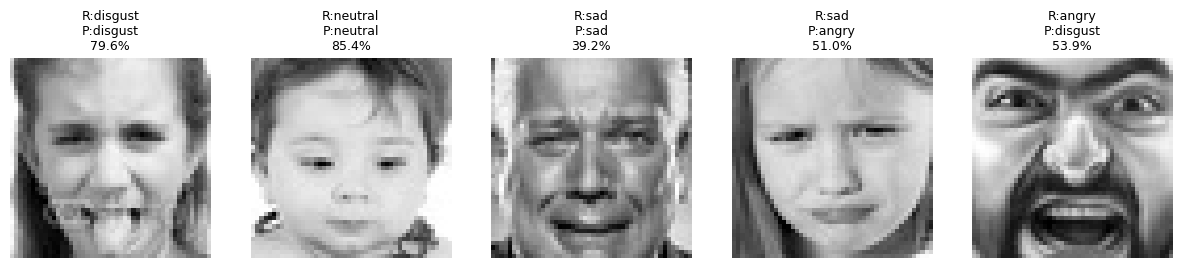

In [ ]:
# FER-2013 · Reconocimiento de emociones con CNN
import os, kagglehub, tensorflow as tf, numpy as np, matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Parámetros
CFG = dict(
    TAM_IMG   =(48, 48),
    LOTE      =128,
    DIV_VAL   =0.10,
    SEMILLA   =42,
    EPOCAS    =50,
    DATASET   ="msambare/fer2013"
)

# Utilidades
def descargar_dataset() -> tuple[str, str]:
    """Descarga FER-2013 (si no existe) y devuelve rutas de train / test."""
    base = kagglehub.dataset_download(CFG["DATASET"])
    return os.path.join(base, "train"), os.path.join(base, "test")


def crear_ds(ruta: str, subconjunto: str | None = None):
    """
    Devuelve el dataset tal cual lo genera Keras (con .class_names intacto).
    El cacheo y barajado se harán más adelante.
    """
    return tf.keras.preprocessing.image_dataset_from_directory(
        ruta,
        validation_split=CFG["DIV_VAL"] if subconjunto else None,
        subset=subconjunto,
        seed=CFG["SEMILLA"],
        color_mode="grayscale",
        image_size=CFG["TAM_IMG"],
        batch_size=CFG["LOTE"]
    )

def calcular_pesos_clase(ruta_train: str, clases: list[str]) -> dict[int, float]:
    """Pondera las clases de forma inversa a su frecuencia."""
    total = sum(len(os.listdir(os.path.join(ruta_train, c))) for c in clases)
    return {i: total / (len(clases) * len(os.listdir(os.path.join(ruta_train, c))))
            for i, c in enumerate(clases)}

def construir_cnn(forma_ent=(48, 48, 1), n_clases=7) -> tf.keras.Model:
    """Crea una CNN profunda sencilla (~1,3 M parámetros)."""
    inp = tf.keras.Input(shape=forma_ent)
    x   = tf.keras.layers.RandomFlip("horizontal")(inp)
    x   = tf.keras.layers.RandomRotation(0.05)(x)
    x   = tf.keras.layers.RandomContrast(0.1)(x)
    x   = tf.keras.layers.Rescaling(1./255)(x)

    for f in (32, 64, 128):
        for _ in range(2):
            x = tf.keras.layers.Conv2D(f, 3, padding="same", activation="relu")(x)
            x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.MaxPooling2D()(x)
        x = tf.keras.layers.Dropout(0.30)(x)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(128, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.40)(x)
    out = tf.keras.layers.Dense(n_clases, activation="softmax")(x)
    return tf.keras.Model(inp, out)

def mostrar_ejemplos(modelo, ds_raw, clases, k=5, semilla=123):
    """Muestra k predicciones aleatorias con su confianza."""
    imgs, labs = [], []
    for img_b, lab_b in ds_raw.shuffle(1000, seed=semilla):
        imgs.extend(img_b[:k-len(imgs)]); labs.extend(lab_b[:k-len(labs)])
        if len(imgs) == k: break
    probs = modelo.predict(tf.stack(imgs), verbose=0)
    preds = np.argmax(probs, 1)

    plt.figure(figsize=(3*k,3))
    for i in range(k):
        plt.subplot(1,k,i+1)
        plt.imshow(imgs[i].numpy().squeeze(), cmap="gray"); plt.axis("off")
        r, p, conf = clases[int(labs[i])], clases[preds[i]], probs[i,preds[i]]*100
        plt.title(f"R:{r}\nP:{p}\n{conf:.1f}%", fontsize=9)
    plt.show()

# Conjuntos
ruta_train, ruta_test = descargar_dataset()
train_raw = crear_ds(ruta_train, "training")
val_raw   = crear_ds(ruta_train, "validation")
test_raw  = crear_ds(ruta_test)

CLASES      = train_raw.class_names
PESOS_CLASE = calcular_pesos_clase(ruta_train, CLASES)

train_ds = train_raw.cache().shuffle(2000).prefetch(tf.data.AUTOTUNE)
val_ds   = val_raw.cache().prefetch(tf.data.AUTOTUNE)
test_ds  = test_raw.cache().prefetch(tf.data.AUTOTUNE)


print("Clases:", CLASES)
print("Pesos de clase:", PESOS_CLASE)

# Modelo
modelo = construir_cnn(forma_ent=CFG["TAM_IMG"] + (1,), n_clases=len(CLASES))
modelo.compile(optimizer=tf.keras.optimizers.Adam(3e-4),
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])
modelo.summary()

# Entrenamiento
callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
             tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5, verbose=1)]

hist = modelo.fit(train_ds,
                  validation_data=val_ds,
                  epochs=CFG["EPOCAS"],
                  class_weight=PESOS_CLASE,
                  callbacks=callbacks,
                  verbose=2)

# Desmepeño
pérd_te, acc_te = modelo.evaluate(test_ds, verbose=0)
print(f"\nExactitud en prueba: {acc_te*100:.2f}%")

y_true, y_pred = [], []
for x_b, y_b in test_raw:
    y_true.extend(y_b.numpy())
    y_pred.extend(modelo.predict(x_b, verbose=0).argmax(1))

print("\nReporte por emoción:\n",
      classification_report(y_true, y_pred, target_names=CLASES))

# Gráficas Bias/Variance
e = range(len(hist.history["loss"]))
plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.plot(e, hist.history["loss"], label="entreno")
plt.plot(e, hist.history["val_loss"], label="val"); plt.title("Pérdida"); plt.legend()
plt.subplot(1,2,2); plt.plot(e, hist.history["accuracy"], label="entreno")
plt.plot(e, hist.history["val_accuracy"], label="val"); plt.title("Exactitud"); plt.legend()
plt.suptitle("Bias vs Varianza — CNN propia"); plt.tight_layout(); plt.show()

x_demo, y_demo = next(iter(test_raw.take(1)))
probs_demo = modelo.predict(x_demo[:1])[0]
print("Real:", CLASES[int(y_demo[0])],
      "  Pred:", CLASES[int(np.argmax(probs_demo))], f"({np.max(probs_demo):.2f})")

# Ejemplo
mostrar_ejemplos(modelo, test_raw, CLASES)
